In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom as dcm

#librairie crop
import PIL
from PIL import Image

import imageio
import numpy
from matplotlib.pyplot import *

#fitter la gaussienne
import scipy.ndimage
import scipy

#cette commande permet d'afficher les figures ci-dessous et pas une fenetre externe
%matplotlib inline

In [15]:
# FONCTION DE LECTURE D UNE IMAGE:

def readImg(filename):
    ds = dcm.read_file(filename)
    pixSize = [(ds[0x0028,0x0030].value)[1], (ds[0x0028,0x0030].value)[0]]

    try:
        rescaleIntercept = ds[0x0028,0x1052].value
        rescaleSlope = ds[0x0028,0x1053].value
    #pour garder les bonnes valeurs sans arrondissement
    except KeyError:
        rescaleIntercept = 0
        rescaleSlope = 1
    pixarray = ds.pixel_array[:,:].astype(np.float32) * rescaleSlope + rescaleIntercept
    image = pixarray[0,:,:] - pixarray[1,:,:]
    return image, pixSize

In [16]:
# FONCTION D INTERPOLATION

def lin_interp(x, y, i, half):
    return x[i] + (x[i+1] - x[i]) * ((half - y[i]) / (y[i+1] - y[i]))

In [17]:
# FONCTION QUI RETOURNE LES DEUX POINTS DU PROFIL A 50%

def half_max(x, y):
    half = max(y)/2.0
    signs = np.sign(np.add(y, - half))
    zero_crossings = (signs[0:-2] != signs[1:-1])
    zero_crossings_i = np.where(zero_crossings)[0]
    lin_interp(x, y, zero_crossings_i[0], half)
    lin_interp(x, y, zero_crossings_i[1], half)
    return [lin_interp(x, y, zero_crossings_i[0], half), lin_interp(x, y, zero_crossings_i[1], half)]

In [18]:
# FONCTION QUI PERMET DE CROPER L IMAGE

def cropImg(image):
    #créer une matrices avec des zeros
    profilex = np.zeros(1024)
    profiley = np.zeros(1024)
    for i in range(0,1024):
        #sommer le lignes
        profilex = profilex + image[i,:]
        #sommer les colonnes
        profiley = profiley + image[:,i]

    abcisse = np.arange(0, 1024, 1)
    hmx = half_max(abcisse, profilex)
    hmy = half_max(abcisse, profiley)
    fwhm = hmx[1] - hmx[0]
    centerx = fwhm / 2 + hmx[0]
    fwhmy = hmy[1] - hmy[0]
    centery = fwhmy / 2 + hmy[0]

    centerX = round(centerx,0)
    centerY = round(centery,0)

    x1 = int(centerX) - 40
    x2 = int(centerX) + 40
    y1 = int(centerY) - 40
    y2 = int(centerY) + 40
    
    partie = image[y1:y2,x1:x2]
    #plt.title('partie')
    #plt.imshow(partie)
    #plt.show()
    return partie

In [19]:
##### distance de 5cm #####
img0, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/5cm/capuchon 5cm pos1.DCM')
img1, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/5cm/capuchon 5cm pos2.DCM')
img2, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/5cm/capuchon 5cm pos3.DCM')
img3, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/5cm/capuchon 5cm pos4.DCM')
img4, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/5cm/capuchon 5cm pos5.DCM')
##### distance de 10cm #####
img01, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/10cm/capuchon 10cm pos1.DCM')
img11, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/10cm/capuchon 10cm pos2.DCM')
img21, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/10cm/capuchon 10cm pos3.DCM')
img31, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/10cm/capuchon 10cm pos4.DCM')
img41, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/10cm/capuchon 10cm pos5.DCM')
##### distance de 15cm #####
img02, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/15cm/capuchon 15cm pos1.DCM')
img12, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/15cm/capuchon 15cm pos2.DCM')
img22, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/15cm/capuchon 15cm pos3.DCM')
img32, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/15cm/capuchon 15cm pos4.DCM')
img42, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/15cm/capuchon 15cm pos5.DCM')
##### distance de 20cm #####
img03, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/20cm/capuchon 20cm pos1.DCM')
img13, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/20cm/capuchon 20cm pos2.DCM')
img23, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/20cm/capuchon 20cm pos3.DCM')
img33, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/20cm/capuchon 20cm pos4.DCM')
img43, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/20cm/capuchon 20cm pos5.DCM')
##### distance de 25cm #####
img04, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/25cm/capuchon 25cm pos1.DCM')
img14, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/25cm/capuchon 25cm pos2.DCM')
img24, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/25cm/capuchon 25cm pos3.DCM')
img34, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/25cm/capuchon 25cm pos4.DCM')
img44, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/25cm/capuchon 25cm pos5.DCM')
##### distance de 30cm #####
img05, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/30cm/capuchon 30cm pos1.DCM')
img15, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/30cm/capuchon 30cm pos2.DCM')
img25, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/30cm/capuchon 30cm pos3.DCM')
img35, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/30cm/capuchon 30cm pos4.DCM')
img45, pixSize = readImg('C:/Users/asmac/Desktop/testdicom/capuchon mesures11mars/30cm/capuchon 30cm pos5.DCM')

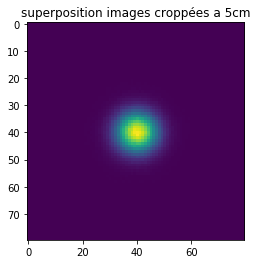

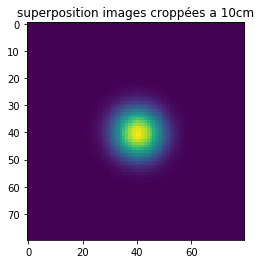

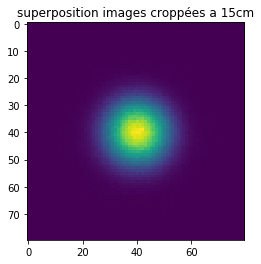

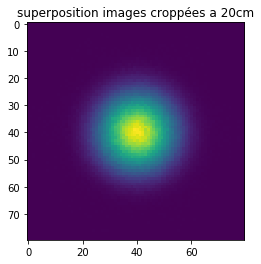

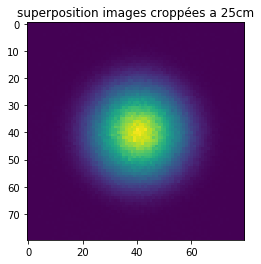

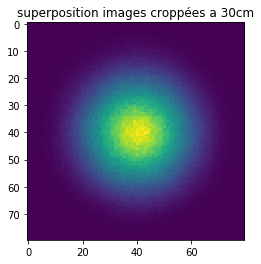

In [20]:
##### distance de 5cm #####
partie0 = cropImg(img0)
partie1 = cropImg(img1)
partie2 = cropImg(img2)
partie3 = cropImg(img3)
partie4 = cropImg(img4)
partiestot0 = partie0 + partie1 + partie2 + partie3 + partie4
plt.title('superposition images croppées a 5cm')
plt.imshow(partiestot0)
plt.show()
##### distance de 10cm #####
partie01 = cropImg(img01)
partie11 = cropImg(img11)
partie21 = cropImg(img21)
partie31 = cropImg(img31)
partie41 = cropImg(img41)
partiestot1 = partie01 + partie11 + partie21 + partie31 + partie41
plt.title('superposition images croppées a 10cm')
plt.imshow(partiestot1)
plt.show()
##### distance de 15cm #####
partie02 = cropImg(img02)
partie12 = cropImg(img12)
partie22 = cropImg(img22)
partie32 = cropImg(img32)
partie42 = cropImg(img42)
partiestot2 = partie02 + partie12 + partie22 + partie32 + partie42
plt.title('superposition images croppées a 15cm')
plt.imshow(partiestot2)
plt.show()
##### distance de 20cm #####
partie03 = cropImg(img03)
partie13 = cropImg(img13)
partie23 = cropImg(img23)
partie33 = cropImg(img33)
partie43 = cropImg(img43)
partiestot3 = partie03 + partie13 + partie23 + partie33 + partie43
plt.title('superposition images croppées a 20cm')
plt.imshow(partiestot3)
plt.show()
##### distance de 25cm #####
partie04 = cropImg(img04)
partie14 = cropImg(img14)
partie24 = cropImg(img24)
partie34 = cropImg(img34)
partie44 = cropImg(img44)
partiestot4 = partie04 + partie14 + partie24 + partie34 + partie44
plt.title('superposition images croppées a 25cm')
plt.imshow(partiestot4)
plt.show()
##### distance de 30cm #####
partie05 = cropImg(img05)
partie15 = cropImg(img15)
partie25 = cropImg(img25)
partie35 = cropImg(img35)
partie45 = cropImg(img45)
partiestot5 = partie05 + partie15 + partie25 + partie35 + partie45
plt.title('superposition images croppées a 30cm')
plt.imshow(partiestot5)
plt.show()

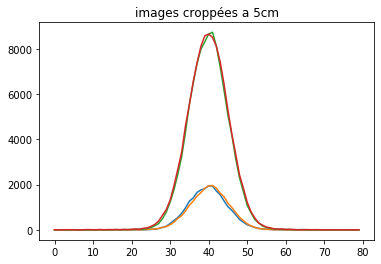

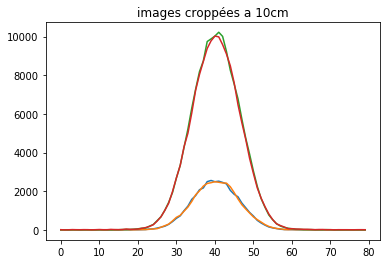

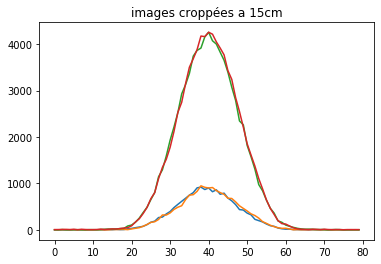

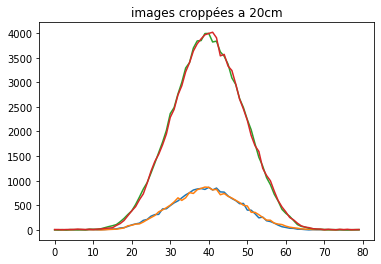

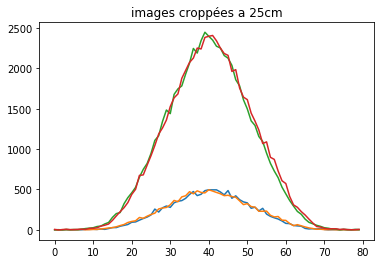

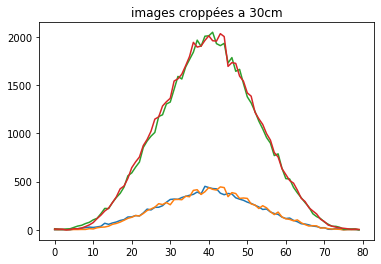

In [21]:
##### distance de 5cm #####
#sommer les lignes des images croppées
profile0x = partie0 [:,40]
profile1x = partie1 [:,40]
profile2x = partie2 [:,40]
profile3x = partie3 [:,40]
profile4x = partie4 [:,40]   
#sommer le colonnesde l'image1 croppée
profile0y = partie0 [40,:]
profile1y = partie1 [40,:]
profile2y = partie2 [40,:]
profile3y = partie3 [40,:]
profile4y = partie4 [40,:]
    
partiestotx = profile0x + profile1x  + profile2x + profile3x  + profile4x     
partiestoty = profile0y + profile1y  + profile2y + profile3y  + profile4y 
plt.title('images croppées a 5cm')

plt.plot(profile0x)
plt.plot(profile0y)
#plt.plot(profile1x)
#plt.plot(profile1y)
#plt.plot(profile2x)
#plt.plot(profile2y)
#plt.plot(profile3x)
#plt.plot(profile3y)
#plt.plot(profile4x)
#plt.plot(profile4y)
plt.plot(partiestotx)
plt.plot(partiestoty)
plt.show()


##### distance de 10cm #####
#sommer les lignes des images croppées
profile0x1 = partie01 [:,40]
profile1x1 = partie11 [:,40]
profile2x1 = partie21 [:,40]
profile3x1 = partie31 [:,40]
profile4x1 = partie41 [:,40]   
#sommer le colonnesde l'image1 croppée
profile0y1 = partie01 [40,:]
profile1y1 = partie11 [40,:]
profile2y1 = partie21 [40,:]
profile3y1 = partie31 [40,:]
profile4y1 = partie41 [40,:]
    
partiestotx1 = profile0x1 + profile1x1  + profile2x1 + profile3x1  + profile4x1     
partiestoty1 = profile0y1 + profile1y1  + profile2y1 + profile3y1  + profile4y1 
plt.title('images croppées a 10cm')

plt.plot(profile0x1)
plt.plot(profile0y1)
plt.plot(partiestotx1)
plt.plot(partiestoty1)
plt.show()


##### distance de 15cm #####
#sommer les lignes des images croppées
profile0x2 = partie02 [:,40]
profile1x2 = partie12 [:,40]
profile2x2 = partie22 [:,40]
profile3x2 = partie32 [:,40]
profile4x2 = partie42 [:,40]   
#sommer le colonnesde l'image1 croppée
profile0y2 = partie02 [40,:]
profile1y2 = partie12 [40,:]
profile2y2 = partie22 [40,:]
profile3y2 = partie32 [40,:]
profile4y2 = partie42 [40,:]
    
partiestotx2 = profile0x2 + profile1x2 + profile2x2 + profile3x2 + profile4x2     
partiestoty2 = profile0y2 + profile1y2 + profile2y2 + profile3y2 + profile4y2 
plt.title('images croppées a 15cm')

plt.plot(profile0x2)
plt.plot(profile0y2)
plt.plot(partiestotx2)
plt.plot(partiestoty2)
plt.show()


##### distance de 20cm #####
#sommer les lignes des images croppées
profile0x3 = partie03 [:,40]
profile1x3 = partie13 [:,40]
profile2x3 = partie23 [:,40]
profile3x3 = partie33 [:,40]
profile4x3 = partie43 [:,40]   
#sommer le colonnes de l'image croppée
profile0y3 = partie03 [40,:]
profile1y3 = partie13 [40,:]
profile2y3 = partie23 [40,:]
profile3y3 = partie33 [40,:]
profile4y3 = partie43 [40,:]
    
partiestotx3 = profile0x3 + profile1x3 + profile2x3 + profile3x3 + profile4x3     
partiestoty3 = profile0y3 + profile1y3 + profile2y3 + profile3y3 + profile4y3 
plt.title('images croppées a 20cm')

plt.plot(profile0x3)
plt.plot(profile0y3)
plt.plot(partiestotx3)
plt.plot(partiestoty3)
plt.show()


##### distance de 25cm #####
#sommer les lignes des images croppées
profile0x4 = partie04 [:,40]
profile1x4 = partie14 [:,40]
profile2x4 = partie24 [:,40]
profile3x4 = partie34 [:,40]
profile4x4 = partie44 [:,40]   
#sommer le colonnesde l'image1 croppée
profile0y4 = partie04 [40,:]
profile1y4 = partie14 [40,:]
profile2y4 = partie24 [40,:]
profile3y4 = partie34 [40,:]
profile4y4 = partie44 [40,:]
    
partiestotx4 = profile0x4 + profile1x4 + profile2x4 + profile3x4 + profile4x4     
partiestoty4 = profile0y4 + profile1y4 + profile2y4 + profile3y4 + profile4y4 
plt.title('images croppées a 25cm')

plt.plot(profile0x4)
plt.plot(profile0y4)
plt.plot(partiestotx4)
plt.plot(partiestoty4)
plt.show()


##### distance de 30cm #####
#sommer les lignes des images croppées
profile0x5 = partie05 [:,40]
profile1x5 = partie15 [:,40]
profile2x5 = partie25 [:,40]
profile3x5 = partie35 [:,40]
profile4x5 = partie45 [:,40]   
#sommer le colonnesde l'image1 croppée
profile0y5 = partie05 [40,:]
profile1y5 = partie15 [40,:]
profile2y5 = partie25 [40,:]
profile3y5 = partie35 [40,:]
profile4y5 = partie45 [40,:]
    
partiestotx5 = profile0x5 + profile1x5 + profile2x5 + profile3x5 + profile4x5     
partiestoty5 = profile0y5 + profile1y5 + profile2y5 + profile3y5 + profile4y5 
plt.title('images croppées a 30cm')

plt.plot(profile0x5)
plt.plot(profile0y5)
plt.plot(partiestotx5)
plt.plot(partiestoty5)
plt.show()

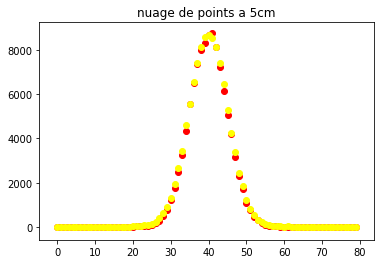

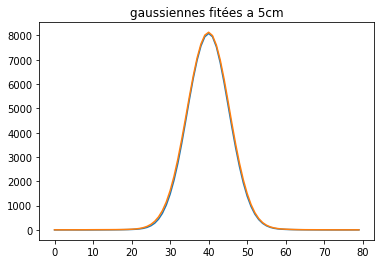

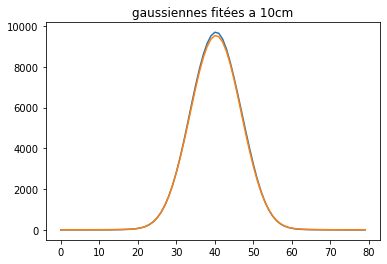

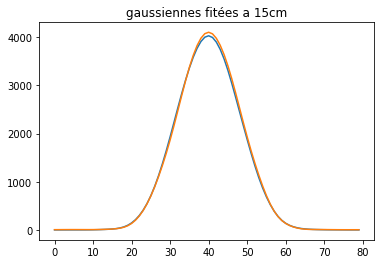

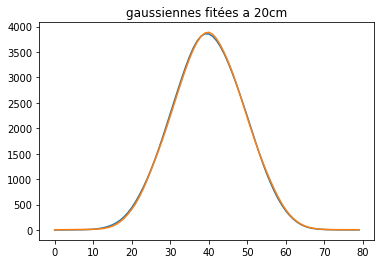

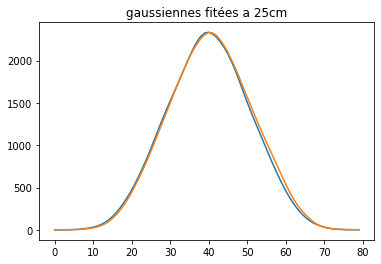

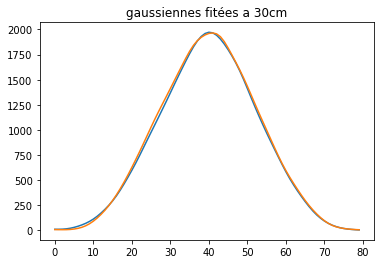

In [22]:
##### distance de 5cm #####
abcisse = np.arange(0, 80, 1)
plt.title('nuage de points a 5cm')
plt.scatter(abcisse, partiestotx, c = 'red')
plt.scatter(abcisse, partiestoty, c = 'yellow')
plt.show()

FITX = scipy.ndimage.filters.gaussian_filter(partiestotx, 2, mode='nearest')
FITY = scipy.ndimage.filters.gaussian_filter(partiestoty, 2, mode='nearest')
plt.title('gaussiennes fitées a 5cm')
plt.plot(FITX)
plt.plot(FITY)
plt.show()


##### distance de 10cm #####
FITX1 = scipy.ndimage.filters.gaussian_filter(partiestotx1, 2, mode='nearest')
FITY1 = scipy.ndimage.filters.gaussian_filter(partiestoty1, 2, mode='nearest')
plt.title('gaussiennes fitées a 10cm')
plt.plot(FITX1)
plt.plot(FITY1)
plt.show()

##### distance de 15cm #####
FITX2 = scipy.ndimage.filters.gaussian_filter(partiestotx2, 2, mode='nearest')
FITY2 = scipy.ndimage.filters.gaussian_filter(partiestoty2, 2, mode='nearest')
plt.title('gaussiennes fitées a 15cm')
plt.plot(FITX2)
plt.plot(FITY2)
plt.show()

##### distance de 20cm #####
FITX3 = scipy.ndimage.filters.gaussian_filter(partiestotx3, 2, mode='nearest')
FITY3 = scipy.ndimage.filters.gaussian_filter(partiestoty3, 2, mode='nearest')
plt.title('gaussiennes fitées a 20cm')
plt.plot(FITX3)
plt.plot(FITY3)
plt.show()

##### distance de 25cm #####
FITX4 = scipy.ndimage.filters.gaussian_filter(partiestotx4, 2, mode='nearest')
FITY4 = scipy.ndimage.filters.gaussian_filter(partiestoty4, 2, mode='nearest')
plt.title('gaussiennes fitées a 25cm')
plt.plot(FITX4)
plt.plot(FITY4)
plt.show()

##### distance de 30cm #####
FITX5 = scipy.ndimage.filters.gaussian_filter(partiestotx5, 2, mode='nearest')
FITY5 = scipy.ndimage.filters.gaussian_filter(partiestoty5, 2, mode='nearest')
plt.title('gaussiennes fitées a 30cm')
plt.plot(FITX5)
plt.plot(FITY5)
plt.show()

In [23]:
abcisse = np.arange(0, 80, 1)

##### distance de 5cm #####
halfmaxtotx = half_max(abcisse, partiestotx)
halfmaxtoty = half_max(abcisse, partiestoty)
#la largeur à mi-hauteur des images cropées:
fwhmXcrop = halfmaxtotx[1] - halfmaxtotx[0]
fwhmYcrop = halfmaxtoty[1] - halfmaxtoty[0]
#print('la mis hauteur de l image totale cropée en x est =',halfmaxtotx)
#print('la mis hauteur de l image totale cropée en y est =',halfmaxtoty)
print('la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmXcrop = ', fwhmXcrop)
print('la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmYcrop = ', fwhmYcrop)


##### distance de 10cm #####
halfmaxtotx1 = half_max(abcisse, partiestotx1)
halfmaxtoty1 = half_max(abcisse, partiestoty1)
#la largeur à mi-hauteur des images cropées:
fwhmXcrop1 = halfmaxtotx1[1] - halfmaxtotx1[0]
fwhmYcrop1 = halfmaxtoty1[1] - halfmaxtoty1[0]
print('la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmXcrop = ', fwhmXcrop1)
print('la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmYcrop = ', fwhmYcrop1)


##### distance de 15cm #####
halfmaxtotx2 = half_max(abcisse, partiestotx2)
halfmaxtoty2 = half_max(abcisse, partiestoty2)
#la largeur à mi-hauteur des images cropées:
fwhmXcrop2 = halfmaxtotx2[1] - halfmaxtotx2[0]
fwhmYcrop2 = halfmaxtoty2[1] - halfmaxtoty2[0]
print('la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmXcrop = ', fwhmXcrop2)
print('la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmYcrop = ', fwhmYcrop2)


##### distance de 20cm #####
halfmaxtotx3 = half_max(abcisse, partiestotx3)
halfmaxtoty3 = half_max(abcisse, partiestoty3)
#la largeur à mi-hauteur des images cropées:
fwhmXcrop3 = halfmaxtotx3[1] - halfmaxtotx3[0]
fwhmYcrop3 = halfmaxtoty3[1] - halfmaxtoty3[0]
print('la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmXcrop = ', fwhmXcrop3)
print('la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmYcrop = ', fwhmYcrop3)


##### distance de 25cm #####
halfmaxtotx4 = half_max(abcisse, partiestotx4)
halfmaxtoty4 = half_max(abcisse, partiestoty4)
#la largeur à mi-hauteur des images cropées:
fwhmXcrop4 = halfmaxtotx4[1] - halfmaxtotx4[0]
fwhmYcrop4 = halfmaxtoty4[1] - halfmaxtoty4[0]
print('la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmXcrop = ', fwhmXcrop4)
print('la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmYcrop = ', fwhmYcrop4)


##### distance de 30cm #####
halfmaxtotx5 = half_max(abcisse, partiestotx5)
halfmaxtoty5 = half_max(abcisse, partiestoty5)
#la largeur à mi-hauteur des images cropées:
fwhmXcrop5 = halfmaxtotx5[1] - halfmaxtotx5[0]
fwhmYcrop5 = halfmaxtoty5[1] - halfmaxtoty5[0]
print('la largeur a mi-hauteur de l image cropée en X à 30cm est fwhmXcrop = ', fwhmXcrop5)
print('la largeur a mi-hauteur de l image cropée en X à 30cm est fwhmYcrop = ', fwhmYcrop5)

la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmXcrop =  11.784010091604003
la largeur a mi-hauteur de l image cropée en X à 5cm est fwhmYcrop =  12.181567888947434
la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmXcrop =  14.748515937540326
la largeur a mi-hauteur de l image cropée en X à 10cm est fwhmYcrop =  14.607123318260477
la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmXcrop =  18.605190272641405
la largeur a mi-hauteur de l image cropée en X à 15cm est fwhmYcrop =  18.20978475188958
la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmXcrop =  22.244361888111886
la largeur a mi-hauteur de l image cropée en X à 20cm est fwhmYcrop =  21.533798123553535
la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmXcrop =  25.177806938407283
la largeur a mi-hauteur de l image cropée en X à 25cm est fwhmYcrop =  25.96793255594075
la largeur a mi-hauteur de l image cropée en X à 30cm est fwhmXcrop =  28.162121212121214
la largeur a m

In [24]:
#MULTIPLIER LA LARGEUR A MI-HAUTEUR PAR LA TAILLE DES PIXELS à 5cm :
TAILLEX = fwhmXcrop * float(pixSize[0])
TAILLEY = fwhmYcrop * float(pixSize[1])
print('La résolution spaciale en X à 5cm est =', TAILLEX)
print('La résolution spaciale en Y à 5cm est =', TAILLEY)

#MULTIPLIER LA LARGEUR A MI-HAUTEUR PAR LA TAILLE DES PIXELS à 10cm :
TAILLEX1 = fwhmXcrop1 * float(pixSize[0])
TAILLEY1 = fwhmYcrop1 * float(pixSize[1])
print('La résolution spaciale en X à 10cm est =', TAILLEX1)
print('La résolution spaciale en Y à 10cm est =', TAILLEY1)

#MULTIPLIER LA LARGEUR A MI-HAUTEUR PAR LA TAILLE DES PIXELS à 15cm :
TAILLEX2 = fwhmXcrop2 * float(pixSize[0])
TAILLEY2 = fwhmYcrop2 * float(pixSize[1])
print('La résolution spaciale en X à 15cm est =', TAILLEX2)
print('La résolution spaciale en Y à 15cm est =', TAILLEY2)

#MULTIPLIER LA LARGEUR A MI-HAUTEUR PAR LA TAILLE DES PIXELS à 20cm :
TAILLEX3 = fwhmXcrop3 * float(pixSize[0])
TAILLEY3 = fwhmYcrop3 * float(pixSize[1])
print('La résolution spaciale en X à 20cm est =', TAILLEX3)
print('La résolution spaciale en Y à 20cm est =', TAILLEY3)

#MULTIPLIER LA LARGEUR A MI-HAUTEUR PAR LA TAILLE DES PIXELS à 25cm :
TAILLEX4 = fwhmXcrop4 * float(pixSize[0])
TAILLEY4 = fwhmYcrop4 * float(pixSize[1])
print('La résolution spaciale en X à 25cm est =', TAILLEX4)
print('La résolution spaciale en Y à 25cm est =', TAILLEY4)

#MULTIPLIER LA LARGEUR A MI-HAUTEUR PAR LA TAILLE DES PIXELS à 30cm :
TAILLEX5 = fwhmXcrop5 * float(pixSize[0])
TAILLEY5 = fwhmYcrop5 * float(pixSize[1])
print('La résolution spaciale en X à 30cm est =', TAILLEX5)
print('La résolution spaciale en Y à 30cm est =', TAILLEY5)

La résolution spaciale en X à 5cm est = 6.507943469280051
La résolution spaciale en Y à 5cm est = 6.727502316461111
La résolution spaciale en X à 10cm est = 8.145148148309458
La résolution spaciale en Y à 10cm est = 8.067061387852396
La résolution spaciale en X à 15cm est = 10.275069826681396
La résolution spaciale en Y à 15cm est = 10.056699615141307
La résolution spaciale en X à 20cm est = 12.284871495585664
La résolution spaciale en Y à 20cm est = 11.892449155896788
La résolution spaciale en X à 25cm est = 13.904922260067252
La résolution spaciale en Y à 25cm est = 14.341284144736841
La résolution spaciale en X à 30cm est = 15.553066519696971
La résolution spaciale en Y à 30cm est = 16.485500370098038


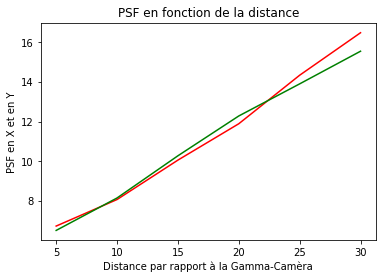

In [26]:
Distance = np.array([5, 10, 15, 20, 25, 30])
PSFX = np.array([TAILLEX, TAILLEX1, TAILLEX2, TAILLEX3, TAILLEX4, TAILLEX5])
PSFY = np.array([TAILLEY, TAILLEY1, TAILLEY2, TAILLEY3, TAILLEY4, TAILLEY5])

plt.title('PSF en fonction de la distance')
plt.plot(Distance, PSFY, c = 'red')
plt.plot(Distance, PSFX, c = 'green')
plt.xlabel("Distance par rapport à la Gamma-Camèra")
plt.ylabel("PSF en X et en Y")
plt.show()
